In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import seaborn as sns

In [43]:
life_file = "Resources/lifeexpectancy.csv"
hale_file = "Resources/halelife.csv"

In [44]:
life_data = pd.read_csv(life_file)
hale_data = pd.read_csv(hale_file)

In [45]:
life_results = pd.merge(life_data, hale_data, how="inner", on=["Location","Period","Sex"])
life_results = life_results.rename(columns = {"Life expectancy at birth (years)": "Life_(years)", "Healthy life expectancy (HALE) at birth (years)":"HALE_(years)"})
life_results.head()

,Location,Period,Sex,Life_(years),HALE_(years)
0,Afghanistan,2019,Both sexes,63.21,53.95
1,Afghanistan,2019,Male,63.29,54.73
2,Afghanistan,2019,Female,63.16,53.15
3,Afghanistan,2015,Both sexes,61.65,52.60
4,Afghanistan,2015,Male,61.04,52.78


In [46]:
# Edit the names to shorter names
life_results["Location"] = life_results["Location"].replace({"United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "United States of America": "United States"})

In [47]:
filtered_countries_df = pd.DataFrame(life_results.query('Location == ["Switzerland","Canada", "Japan", "Germany", "Australia", "United States", "United Kingdom", "Liberia", "Nigeria", "Madagascar"]'))
#filtered_countries_df.set_index("Location").head()
countries = filtered_countries_df["Location"].unique()
countries

array(['Australia', 'Canada', 'Germany', 'Japan', 'Liberia', 'Madagascar',
       'Nigeria', 'Switzerland', 'United Kingdom', 'United States'],
      dtype=object)

In [48]:

filtered_countries_df.dtypes

Location         object
Period            int64
Sex              object
Life_(years)    float64
HALE_(years)    float64
dtype: object

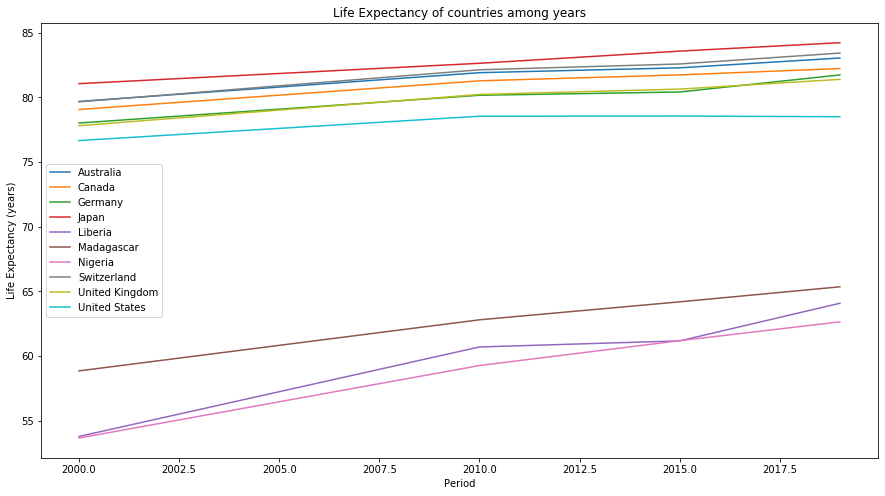

In [49]:
plt.figure(figsize = (15, 8))

for country in countries:
    df = filtered_countries_df[filtered_countries_df["Location"]==country][["Location","Period","Life_(years)"]].groupby("Period").mean()
 
    plt.plot(df.index, df["Life_(years)"], label = country)

plt.xlabel("Period")
plt.ylabel("Life Expectancy (years)")
plt.title("Life Expectancy of countries among years")
plt.legend()    
plt.savefig("My Project Images/ Life Expectancy among years.png")

plt.show()

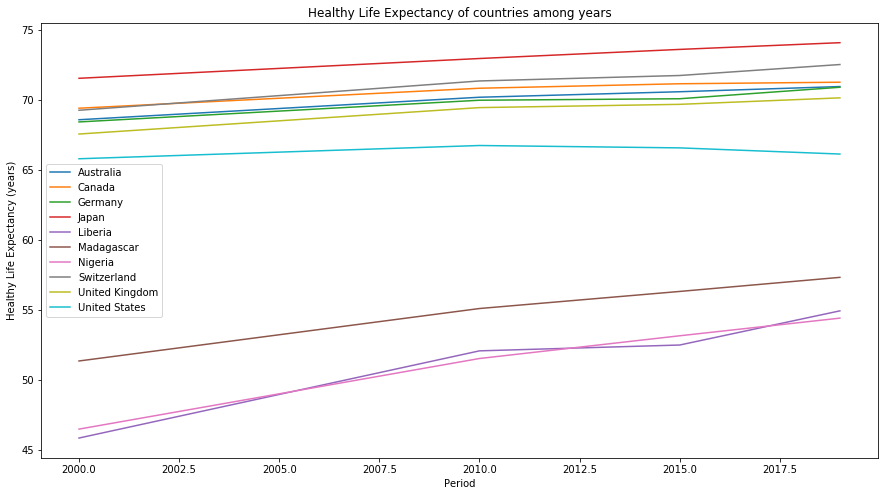

In [50]:
plt.figure(figsize = (15, 8))

for country in countries:
    df = filtered_countries_df[filtered_countries_df["Location"]==country][["Location","Period","HALE_(years)"]].groupby("Period").mean()
 
    plt.plot(df.index, df["HALE_(years)"], label = country)

plt.xlabel("Period")
plt.ylabel("Healthy Life Expectancy (years)")
plt.title("Healthy Life Expectancy of countries among years")
plt.legend()    
plt.savefig("My Project Images/ Healthy Life Expectancy among years.png")
plt.show()

In [51]:
life_2000 = pd.DataFrame(filtered_countries_df.query("Period == '2000'"))
life_2010 = pd.DataFrame(filtered_countries_df.query("Period == '2010'"))
life_2015 = pd.DataFrame(filtered_countries_df.query("Period == '2015'"))

years = [life_2000, life_2010, life_2015]

,Period,Life_(years),HALE_(years)
Location,,,
United States,2000,76.660000,65.780000
United Kingdom,2000,77.810000,67.546667
Switzerland,2000,79.653333,69.243333
Nigeria,2000,53.653333,46.470000
Madagascar,2000,58.846667,51.336667
Liberia,2000,53.776667,45.833333
Japan,2000,81.060000,71.526667
Germany,2000,78.016667,68.410000
Canada,2000,79.063333,69.390000


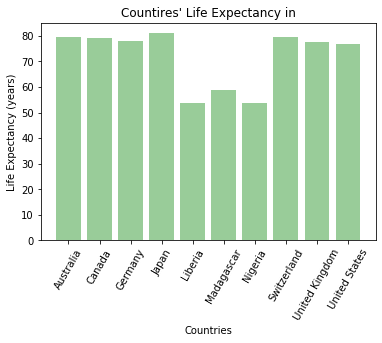

,Period,Life_(years),HALE_(years)
Location,,,
United States,2010,78.543333,66.726667
United Kingdom,2010,80.226667,69.433333
Switzerland,2010,82.133333,71.336667
Nigeria,2010,59.260000,51.513333
Madagascar,2010,62.796667,55.083333
Liberia,2010,60.696667,52.060000
Japan,2010,82.636667,72.940000
Germany,2010,80.163333,69.960000
Canada,2010,81.280000,70.816667


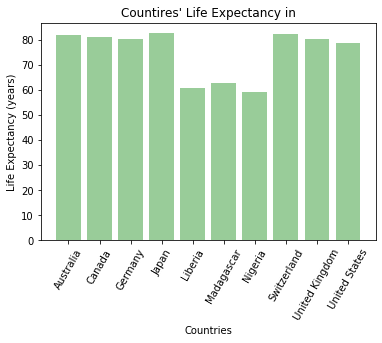

,Period,Life_(years),HALE_(years)
Location,,,
United States,2015,78.556667,66.556667
United Kingdom,2015,80.640000,69.666667
Switzerland,2015,82.583333,71.726667
Nigeria,2015,61.183333,53.136667
Madagascar,2015,64.186667,56.303333
Liberia,2015,61.166667,52.476667
Japan,2015,83.576667,73.590000
Germany,2015,80.416667,70.066667
Canada,2015,81.740000,71.136667


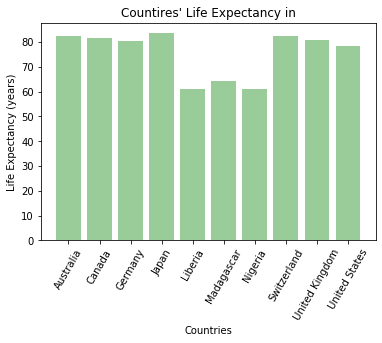

In [52]:
# Group by mean for life expectancy for each country and make a bar chart for it
for year  in years:
    life_summary = year.groupby("Location").mean()
    display(life_summary.sort_values(["Location"], ascending = False))
    plt.bar(life_summary.index,life_summary["Life_(years)"],color = "green", alpha = 0.4)
    plt.xticks(rotation = 60)
    plt.title("Countires' Life Expectancy in" )
    plt.xlabel("Countries")
    plt.ylabel("Life Expectancy (years)")

    # plt.savefig("My Project Images/ Countries Life Expectancy in" + str(year["Period"]) + ".png", bbox_inches ="tight")

    plt.show()


,Period,Life_(years),HALE_(years)
Location,,,
United States,2000,76.660000,65.780000
United Kingdom,2000,77.810000,67.546667
Switzerland,2000,79.653333,69.243333
Nigeria,2000,53.653333,46.470000
Madagascar,2000,58.846667,51.336667
Liberia,2000,53.776667,45.833333
Japan,2000,81.060000,71.526667
Germany,2000,78.016667,68.410000
Canada,2000,79.063333,69.390000


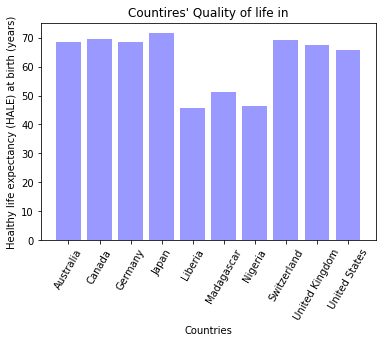

,Period,Life_(years),HALE_(years)
Location,,,
United States,2010,78.543333,66.726667
United Kingdom,2010,80.226667,69.433333
Switzerland,2010,82.133333,71.336667
Nigeria,2010,59.260000,51.513333
Madagascar,2010,62.796667,55.083333
Liberia,2010,60.696667,52.060000
Japan,2010,82.636667,72.940000
Germany,2010,80.163333,69.960000
Canada,2010,81.280000,70.816667


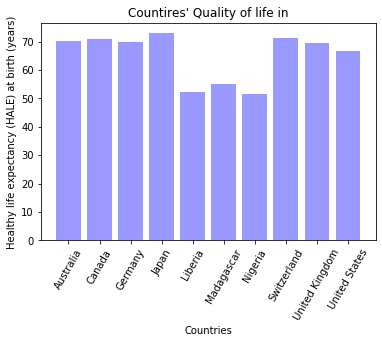

,Period,Life_(years),HALE_(years)
Location,,,
United States,2015,78.556667,66.556667
United Kingdom,2015,80.640000,69.666667
Switzerland,2015,82.583333,71.726667
Nigeria,2015,61.183333,53.136667
Madagascar,2015,64.186667,56.303333
Liberia,2015,61.166667,52.476667
Japan,2015,83.576667,73.590000
Germany,2015,80.416667,70.066667
Canada,2015,81.740000,71.136667


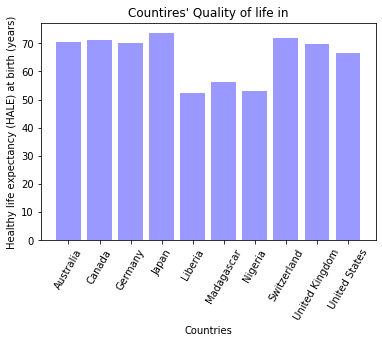

In [53]:
for year  in years:
    life_summary = year.groupby("Location").mean()
    display(life_summary.sort_values(["Location"], ascending = False))
    plt.bar(life_summary.index,life_summary["HALE_(years)"], color = "blue", alpha = 0.4)
    plt.xticks(rotation = 60)
    plt.title("Countires' Quality of life in" )
    plt.xlabel("Countries")
    plt.ylabel("Healthy life expectancy (HALE) at birth (years)")

    #plt.savefig("My Project Images/ Countries Life Expectancy in" + str(year["Period"]) + ".png", bbox_inches ="tight")
    plt.show()


In [54]:
# # Create a bar chart combining 2000, 2010 and 2015 to do comparison for life expectancy 

# labels = countries
# y = life_2000[Life_(year)]
# z = life_2010.Life_(year)
# k = life_2015.Life_(year)

# x = np.arange(len(labels))
# width = 0.4

# fig = plt. figure(figsize = (15,8))
# ax = fig.add_subplot()

# # rects1 = ax.bar(x - width/2, y, width, label = "2000")
# # rects2 = ax.bar(x - width/2, z, width, label = "2010")
# # rects3 = ax.bar(x - width/2, k, width, label = "2015")

# ax.set_xlabel("Country")
# ax.set_ylabel("Life Expectancy (years)")
# ax.set_title("Life expectancy in different countries in 2000,2010 and 2015")
# ax.set_xticks(x)
# ax.set_xticklabels(labels, rotation =60)

# # def autolabel(rects):
    
# #     for rect in rects:
# #         height = rect.get_height()
# #         ax.annotate('{}'.format(height),
# #                     xy=(rect.get_x() + rect.get_width() / 2, height),
# #                     xytext=(0, 3),  # 3 points vertical offset
# #                     textcoords="offset points",
# #                     ha='center', va='bottom')

# # autolabel(rects1)
# # autolabel(rects2)




In [55]:
# Plot multipe bar chart in matplotlib
# https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars
# Plot with seaborn
# https://datavizpyr.com/grouped-barplots-in-python-with-seaborn/


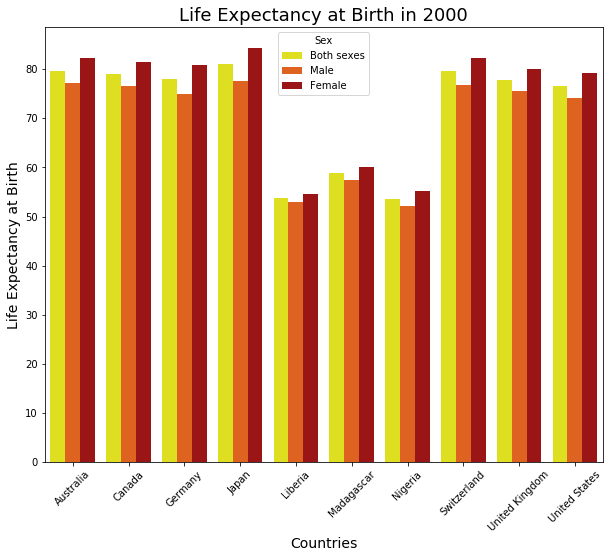

In [59]:
# Bar graph for gender and Life Expectancy among Countries in 2000
plt.figure(figsize=(10, 8))
sns.barplot(x="Location", 
    y="Life_(years)",
    hue = "Sex",
    data = life_2000,
    ci=None,
    palette = ("hot_r"))

plt.ylabel("Life Expectancy at Birth", size=14)
plt.xlabel("Countries", size=14)
plt.xticks(rotation = 45)
plt.title("Life Expectancy at Birth in 2000", size=18)
plt.savefig("My Project Images/ 2000 Life Expectancy among gender.png")

plt.show()


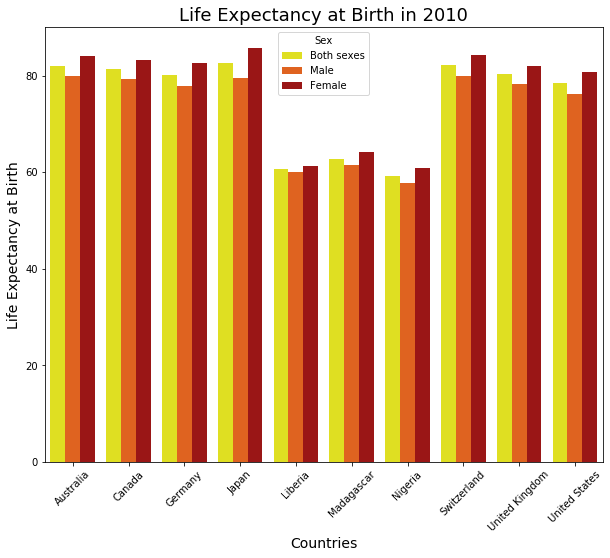

In [60]:
# Bar graph for gender and Life Expectancy among Countries in 2010
plt.figure(figsize=(10, 8))
sns.barplot(x="Location", 
    y="Life_(years)",
    hue = "Sex",
    data = life_2010,
    ci=None,
    palette = ("hot_r"))

plt.ylabel("Life Expectancy at Birth", size=14)
plt.xlabel("Countries", size=14)
plt.xticks(rotation = 45)
plt.title("Life Expectancy at Birth in 2010", size=18)
plt.savefig("My Project Images/ 2010 Life Expectancy among gender.png")

plt.show()
